# Exploratory Data Analysis(EDA)

For this assignment we will be working with Titanic Dataset from Kaggle.

During her maiden voyage on April 15, 1912, the largest passenger ship ever built collided with an iceberg. The Titanic sank, killing 1502 passengers and crew members out of a total of 2224. The international society was shocked by the disaster, which resulted in improved ship safety rules. There were not enough lifeboats for the passengers and crew, which was one of the reasons for the shipwreck's high death toll. Despite the fact that some persons were more likely to survive the sinking than others, there were other groups of people who were more likely to survive.

The Dataset (titanic.csv) file provides information on 891 actual Titanic passengers. Each row represents a single individual. The columns include many aspects of the person's life, such as whether or not they Survived, their Age, Passenger-class, Sex, Fare paid, Name, Cabin, Ticket, Embarked, Sibling Spouse(SibSp) and Parent Child(Parch).

# Let's import the necessary libraries


In [1]:
#Done by Sharon Rose S
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

To begin, lets start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv(r"C:\Users\Sharon\Desktop\IBM_ML\EDA\titanic_train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA 
Let's get started with some data exploration! We'll strategize by looking for missing data.

# Missing Data
To check for missing data, we'll utilise the built-in function isnull(), which is available within the dataframe.

Output: True - it's null, False - not null

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Data Exploration and Visualization
Let's utilise the seaborn library to develop a simple heatmap to visualize the null values. 

<AxesSubplot:>

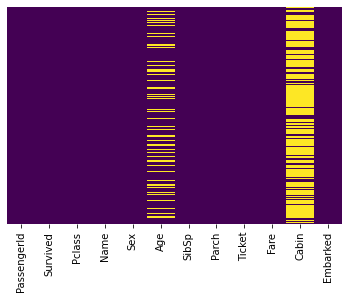

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

More NaN values is observed in the Age and Cabin columns in the above visualisation.

Approximately 20% of the Age data is missing. The percentage of Age that is missing is likely minimal enough to be replaced reasonably with some sort of imputation. Looking at the Cabin column, it appears that we are lacking far too much information to accomplish anything useful with at a basic level. We'll probably remove that or replace it with something like "Cabin Known: 1 or 0" eventually.

—Now let's use counterplot to our advantage—

Let's make a countplot based on the survived column.
Countplots allow us to see how many people died and how many people survived from the 891 records.

<AxesSubplot:xlabel='Survived', ylabel='count'>

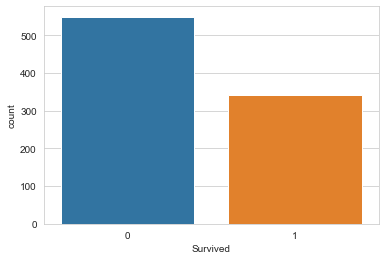

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

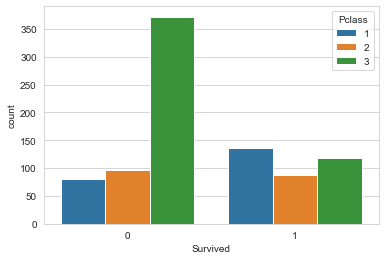

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)


We can see from the graph above that travellers from pclass 3 have died in greater numbers than passengers from pclass 1 and 2.

<AxesSubplot:xlabel='Survived', ylabel='count'>

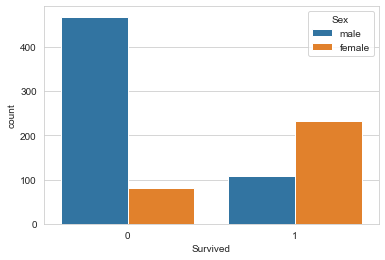

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

We can see from the graph above that male passengers have died in greater numbers than female passengers considering the 891 records of the dataset.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

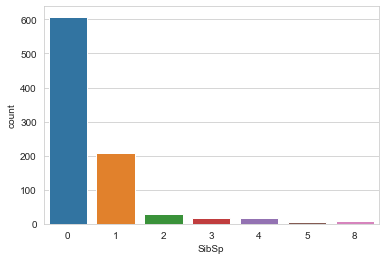

In [10]:
sns.countplot(x='SibSp',data=train)

The graph above shows the number of travellers who did not have a spouse or sibling. As can be seen, many travellers did not have a spouse or sibling.

Now, using the distplot, we can observe if the age follows a normal distribution or not, which will help us figure out what the average age of the travellers on the boat was.

<AxesSubplot:xlabel='Age'>

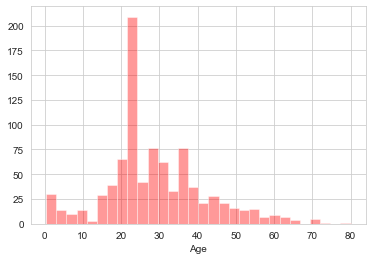

In [23]:
sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=30)

The graph above shows that the average age between 17 and 30 is the greatest, while the number of senior individuals who have travelled is the lowest.

# Data Cleaning
Instead of discarding the missing age data rows, we'd like to fill up the gaps. Filling in the average age of all passengers is one method to do this.
We can, however, smarter about this and check the average age by passenger class by making use of boxplot and a simple function to replace null values. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

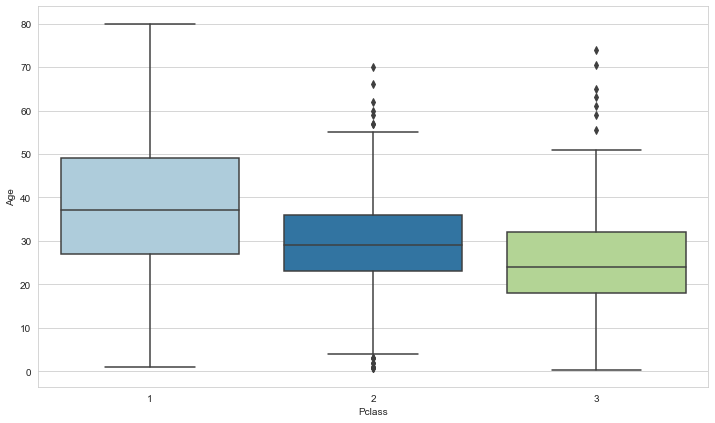

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='Paired')

We can see that the wealthy passengers in the upper classes are older, which is understandable. We'll infer based on Pclass for Age using these average age values.

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now, let's use the function we just defined.

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Let's take a look at that heat map once more!

<AxesSubplot:>

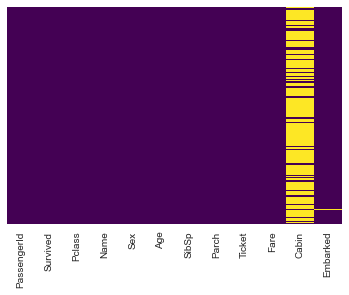

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The null values in the Age column have now been replaced with values pertaining to the passenger class.


Great! Let's get rid of the Cabin column and the NaN-filled row in Embarked.

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train.dropna(inplace=True)

we cleansed the data and it is ready for further analysis

<AxesSubplot:>

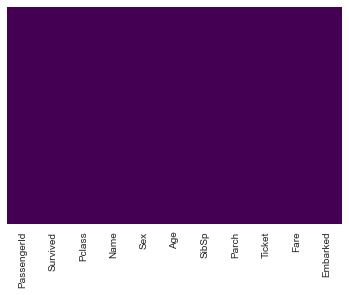

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Hypothesis

1) The hypothesis for this question is that people's socio-economic level had an impact on their survival rate.

Null Hypothesis(H0) : The socio-economic class of the people didn’t have an effect on the survival rate.

Alternative Hypothesis(HA) : The socio-economic class of the people affected their survival rate.


2) The hypothesis for this question is that more than half of the passengers who survived the Titanic were between the ages of 20 and 40.

Null Hypothesis(H0) : Less than 50% of passengers who survived in Titanic are in the age group of 20–40

Alternative Hypothesis(HA) : Greater than 50% of passengers who survived in Titanic are in the age group of 20–40


3) The hypothesis for this question is that age affects survival chances.

Null Hypothesis(H0) : The age group has an effect on survival odds

Alternative Hypothesis(HA) :  Survivability is unaffected by age group.

In [20]:
#Solution for Hypothesis no.3
from scipy import stats

In [21]:
table = pd.crosstab([train['Survived']], train['Age'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
  
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
print(results)

[['Chi-Square Test', 110.20372747951563], ['P-Value', 0.047184688944026235]]


Because the P-Value is less than 0.05, the likelihood that the survivability is unaffected by age group is high. As a result, I believe we can rule out the null hypothesis.